### 1. Carregamento de Bibliotecas

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from entropy import *
import matplotlib.pyplot as plt

### 2. Tratamento dos dados de entrada

In [2]:
with open('resultados_100_antigo.txt', 'r') as f:
    resultados = f.readlines()

sentences = []
num_try = []

for resultado in resultados:
    _, try_ = resultado.split(':')
    try_ = try_.strip()
    try_ = try_.split(',')
    try_[0] = try_[0].split('[')[1]
    try_[-1] = try_[-1].split(']')[0]
    try_ = [int(x) for x in try_]
    sentences.append(try_)

### 3. Cálculo dos limites superiores, inferiores e Entropia

In [3]:
upper_bounds = []
lower_bounds = []
entropy = []

for sentence in sentences:
    up = calc_upper_bound(sentence)
    lb = calc_lower_bound(sentence)
    upper_bounds.append(up)
    lower_bounds.append(lb)
    entropy.append(up)
    
final_entropy = np.mean(entropy)
final_entropy_std = np.std(entropy)

In [4]:
print('Entropia final:', final_entropy, "bps")
print('Desvio padrão:', final_entropy_std, "bps")

Entropia final: 3.01735674403092 bps
Desvio padrão: 0.3174761311989708 bps


### 4. Cálculo dos Ub, Lb, e Entropia com contextos variáveis (1 até 14)

In [5]:
upper_bounds_chart = []
lower_bounds_chart = []

for i in range(2, 16+1):
    upper_bounds = []
    lower_bounds = []
    entropy = []
    for sentence in sentences:
        # sentence = sentence[:i]
        up = calc_upper_bound(sentence[:i])
        lb = calc_lower_bound(sentence[:i])
        upper_bounds.append(up)
        lower_bounds.append(lb)
        
    upper_bounds_chart.append(np.mean(upper_bounds))
    lower_bounds_chart.append(np.mean(lower_bounds))

In [6]:
print('Intervalo da entropia para cada nível de contexto:')
for i in range(3, 16+1):
    a = (lower_bounds_chart[i-3], upper_bounds_chart[i-3])
    print(f"contexto {i - 2}: {a}")

Intervalo da entropia para cada nível de contexto:
contexto 1: (-7.961843662338163, 0.98)
contexto 2: (-10.928035532949277, 1.5065965840400661)
contexto 3: (-14.939209290582404, 1.8562255624891828)
contexto 4: (-15.28847751127235, 2.1053987698743817)
contexto 5: (-15.33600038612659, 2.2786717715364606)
contexto 6: (-13.963526674044545, 2.4369489041788266)
contexto 7: (-12.75961876378586, 2.560563906222957)
contexto 8: (-13.934262525530498, 2.65562257082666)
contexto 9: (-13.48132913114443, 2.7485265823202947)
contexto 10: (-13.587435083689186, 2.8025468036086765)
contexto 11: (-13.648080377549862, 2.877785503597163)
contexto 12: (-13.435356339518297, 2.9319164571057943)
contexto 13: (-12.984008946440115, 2.976603851518253)
contexto 14: (-12.777537501479644, 3.01735674403092)


### 5. Visualização dos resultados

#### 5.1 Plotagem dos limites das entropias de acordo com o tamanho de contexto

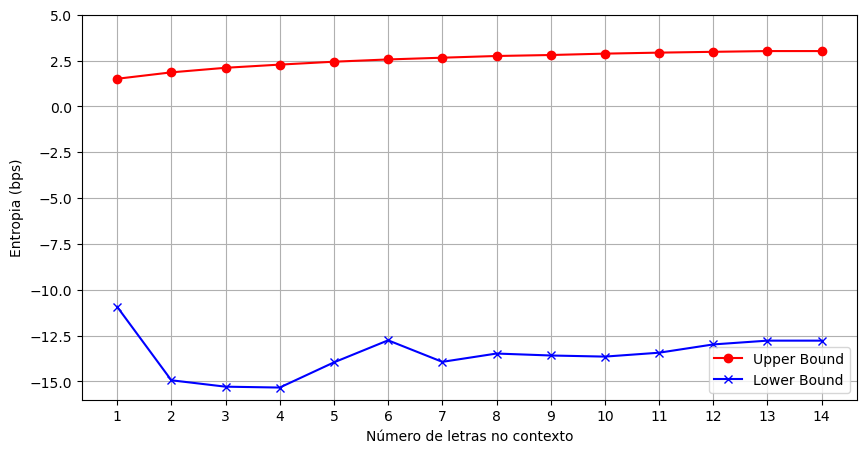

In [7]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 15), upper_bounds_chart[1:], label='Upper Bound', marker="o", color='red')
plt.plot(range(1, 15), lower_bounds_chart[1:], label='Lower Bound', marker="x", color='blue')
plt.ylim(-16, 5)
plt.xlabel('Número de letras no contexto')
plt.ylabel('Entropia (bps)')
plt.legend()
plt.xticks(range(1, 15), range(1, 15))
plt.grid()
plt.show()

#### 5.2 Tabela de Frequência de respostas dada a quantidade de contexto

In [8]:
table_df = pd.DataFrame(columns=[n for n in range(1, 16)], index=[n for n in range(1, 28)])
table_df.fillna(0, inplace=True)
table_df = pd.DataFrame(columns=[f"ctx_{n}" for n in range(1, 16)], index=[f"g_{n}" for n in range(1, 28)])
table_df.fillna(0, inplace=True)


for i in range(len(resultados)):
    for j in range(15):
        table_df.iloc[sentences[i][j] - 1, j] += 1

table_df

,ctx_1,ctx_2,ctx_3,ctx_4,ctx_5,ctx_6,ctx_7,ctx_8,ctx_9,ctx_10,ctx_11,ctx_12,ctx_13,ctx_14,ctx_15
g_1,9,26,15,13,11,13,19,14,23,19,24,19,21,21,23
g_2,7,13,6,11,9,10,12,12,8,11,6,4,14,13,10
g_3,6,5,13,11,13,12,11,13,3,7,12,12,6,10,14
g_4,7,8,8,3,2,5,6,6,5,6,6,4,6,10,11
g_5,5,3,4,4,8,7,3,9,1,6,1,4,6,5,5
g_6,6,5,2,6,4,9,7,9,5,3,2,3,6,2,7
g_7,3,1,4,6,7,5,10,7,4,5,3,6,6,3,7
g_8,0,5,10,2,2,3,2,2,5,4,3,4,1,4,5
g_9,7,0,4,3,2,3,1,2,3,4,6,1,4,2,2
g_10,0,3,1,3,6,3,2,6,2,4,4,4,3,4,0


#### 5.3 Tabela de Frequência de momentos de acertos do GPT

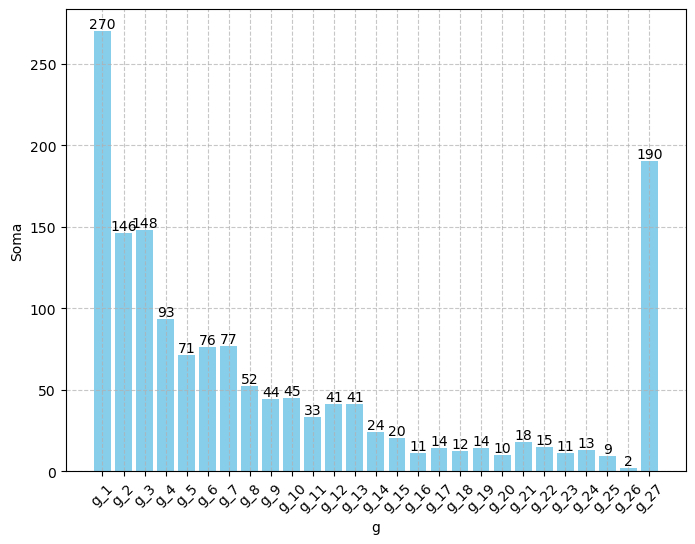

In [9]:
gs = ['g_{}'.format(i) for i in range(1, 28)]

plt.figure(figsize=(8, 6))
bars = plt.bar(gs, table_df.sum(axis=1).values, color='skyblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             '{}'.format(int(bar.get_height())), 
             ha='center', va='bottom')

plt.xlabel('g')
plt.ylabel('Soma')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
